#             Unsupervised Learning_R5_Project2_Vehicle

The purpose of the case study is to classify a given silhouette as one of three different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double-decker bus, Chevrolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The points distribution for this case is as follows:

1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy. (10 points)

In [310]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time

In [311]:
vehicle= pd.read_csv('vehicle.csv')

In [312]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


###### 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [313]:
X=vehicle.drop(columns='class',axis=1)
y=vehicle['class']

Just considering X part only for data cleaning. 

In [314]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

There are total 846 rows in the file whereas values are missing for many of the features.  

If we observe here, all the missing values are having float64 datatype and all the float type variables having null values. 

In [315]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


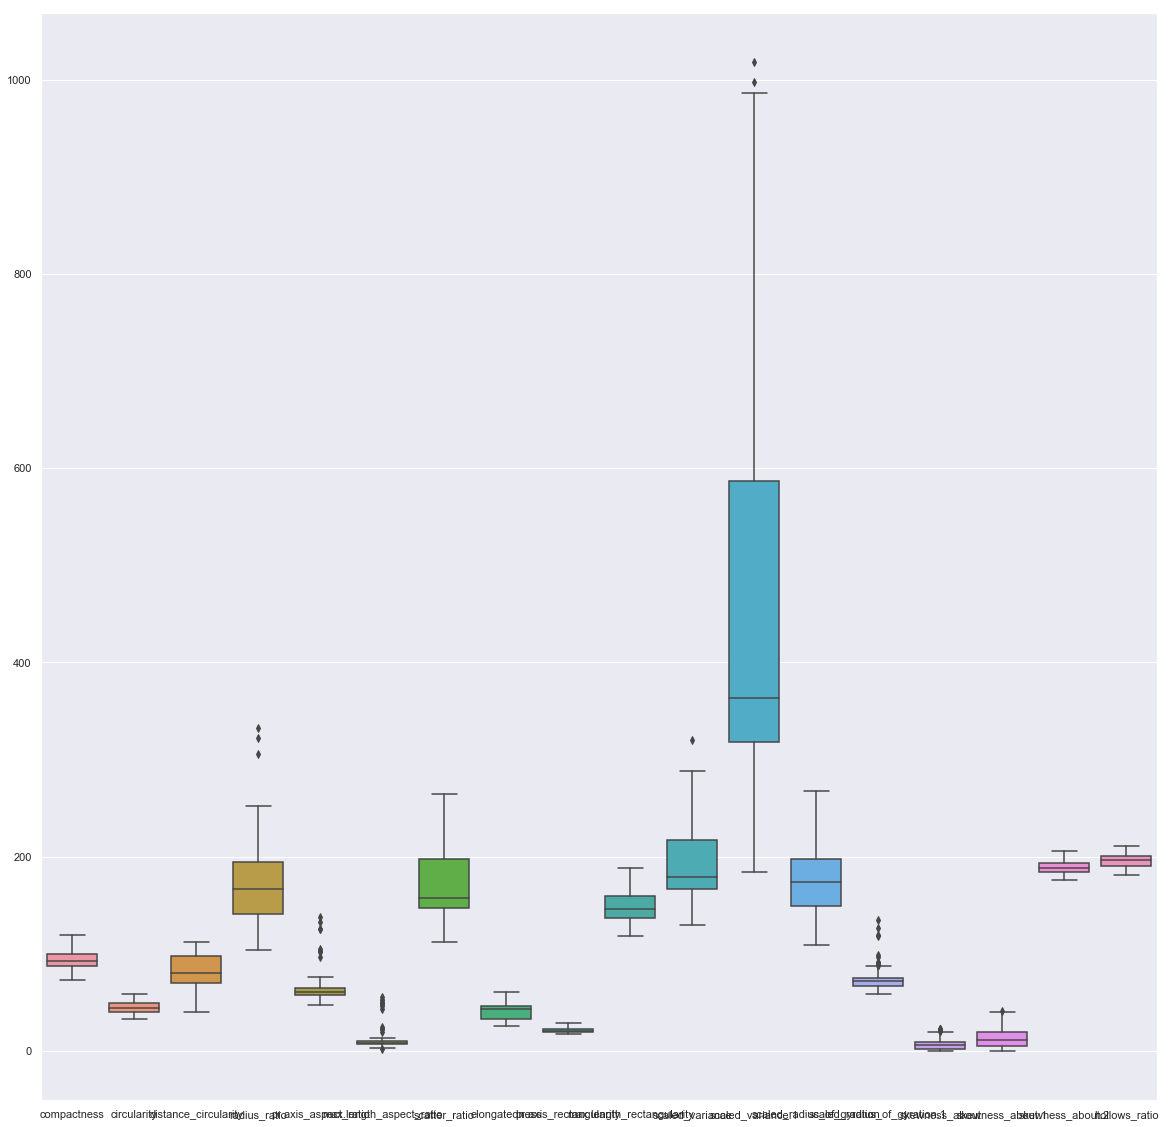

In [316]:
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(data=X)

We do see outliers in 8 columns out of 19 before we treat the missing values.

In [317]:
X.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [318]:
X[X.isna().any(axis=1)].head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184


In [319]:
X[X.isna().any(axis=1)].shape

(33, 18)

There are 33 rows where atleast one column has null values. We need to treat these null values. We will replace missing values for all the variables with median to keep box plot as is. 

In [320]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [321]:
X = X.apply(lambda x:x.fillna(x.median()),axis=0)

In [322]:
X[X.isna().any(axis=1)].head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio


Now there are no missing values.

In [323]:
X.iloc[[5,9,19,35,66],:]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183
9,93,44.0,98.0,167.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204
19,101,56.0,100.0,215.0,61.0,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193
35,100,46.0,80.0,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,71.5,6.0,18.0,179.0,184


Verified that all the missing values are replaced with median values. Now see the box plot again.

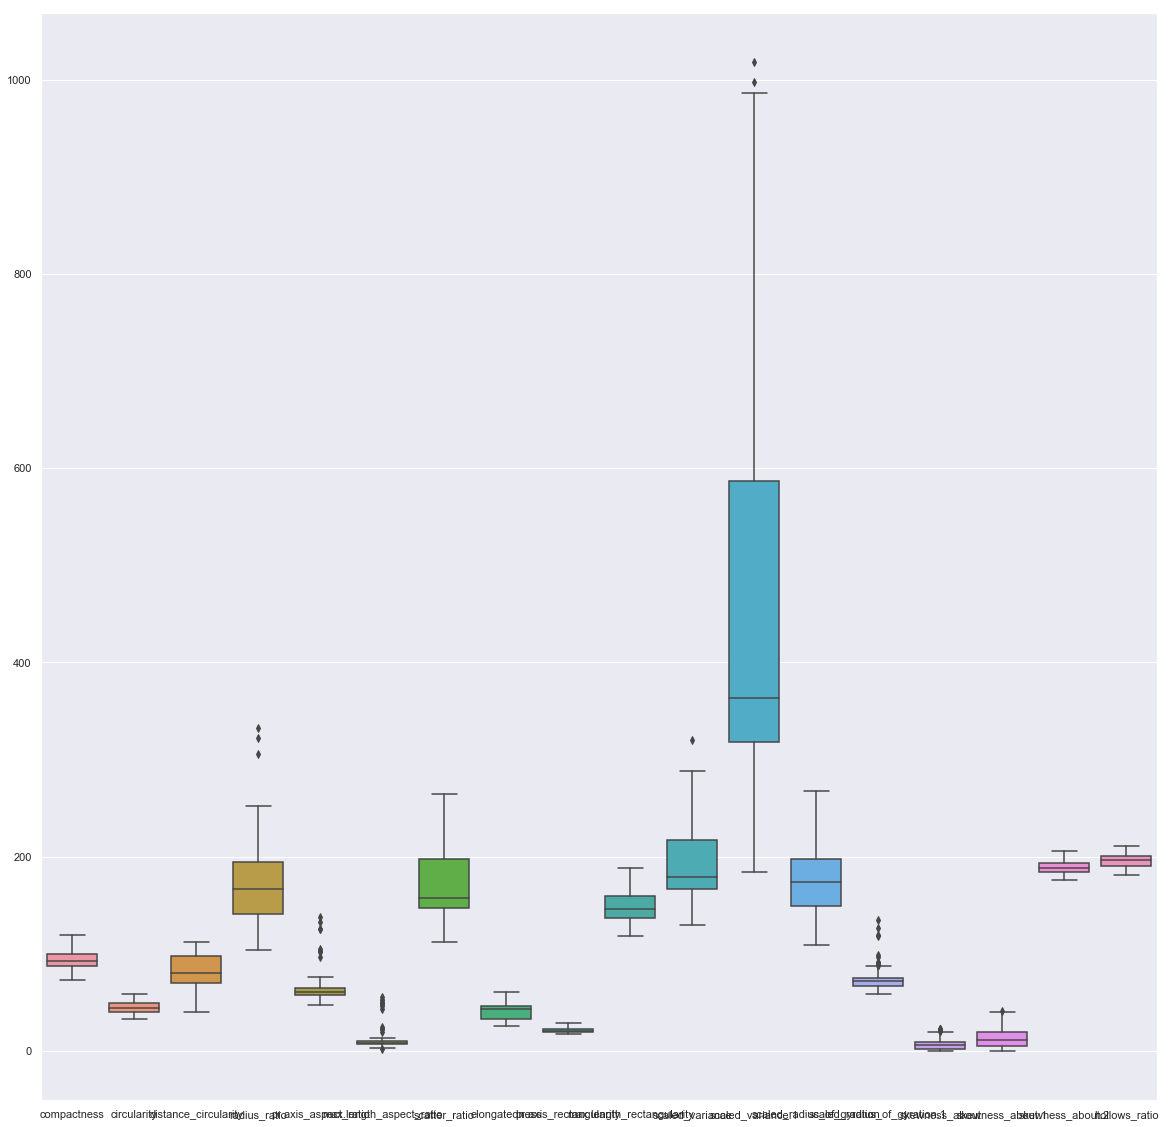

In [324]:
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(data=X)

Those 8 columns are still showing outliers. Now we need to treat the outliers.

In [325]:
def detect_outlier(data_1):
    outliers=[]
    Q1 = np.quantile(data_1,.25)
    Q2 = np.quantile(data_1,.5)
    Q3 = np.quantile(data_1,.75)
    IQR = Q3 - Q1
    LowerOutlier = Q1 - (1.5*IQR)
    HigherOutlier = Q3 + (1.5*IQR)
        
    for c in data_1:
        if (c < LowerOutlier) |  (c > HigherOutlier):
            outliers.append(c)
    return outliers


print('column: \t #count \t values')
for column in X:
    print(column, '\t', len(detect_outlier(X[column])), '\t' , detect_outlier(X[column]), ) 

column: 	 #count 	 values
compactness 	 0 	 []
circularity 	 0 	 []
distance_circularity 	 0 	 []
radius_ratio 	 3 	 [306.0, 322.0, 333.0]
pr.axis_aspect_ratio 	 8 	 [103.0, 126.0, 126.0, 133.0, 102.0, 138.0, 97.0, 105.0]
max.length_aspect_ratio 	 13 	 [52, 49, 52, 22, 48, 43, 49, 25, 46, 19, 2, 55, 22]
scatter_ratio 	 0 	 []
elongatedness 	 0 	 []
pr.axis_rectangularity 	 0 	 []
max.length_rectangularity 	 0 	 []
scaled_variance 	 1 	 [320.0]
scaled_variance.1 	 2 	 [998.0, 1018.0]
scaled_radius_of_gyration 	 0 	 []
scaled_radius_of_gyration.1 	 15 	 [127.0, 118.0, 88.0, 88.0, 119.0, 97.0, 89.0, 90.0, 88.0, 135.0, 88.0, 91.0, 90.0, 99.0, 88.0]
skewness_about 	 12 	 [20.0, 21.0, 22.0, 20.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 20.0, 21.0]
skewness_about.1 	 1 	 [41.0]
skewness_about.2 	 0 	 []
hollows_ratio 	 0 	 []


Fixing outlier for radius_ratio:

In [326]:
pd.crosstab(X['radius_ratio'],y)

class,bus,car,van
radius_ratio,,,
104.0,0,1,0
105.0,0,0,1
109.0,0,0,1
110.0,0,1,2
111.0,0,1,3
112.0,0,0,1
113.0,2,0,2
114.0,0,1,3
115.0,0,2,2


Since all the 3 outliers in radius_ratio is in van class hence moving outliers also in nearest data point which belongs to VAN class.

In [327]:
X['radius_ratio'] = np.where(X['radius_ratio'] >= 306.0,250.0,X['radius_ratio'])

In [328]:
pd.crosstab(X['radius_ratio'],y)

class,bus,car,van
radius_ratio,,,
104.0,0,1,0
105.0,0,0,1
109.0,0,0,1
110.0,0,1,2
111.0,0,1,3
112.0,0,0,1
113.0,2,0,2
114.0,0,1,3
115.0,0,2,2


Fixing outlier for pr.axis_aspect_ratio variable now: 

In [329]:
pd.crosstab(X['pr.axis_aspect_ratio'],y)

class,bus,car,van
pr.axis_aspect_ratio,,,
47.0,2,0,0
48.0,1,0,3
49.0,1,0,2
50.0,3,1,1
51.0,7,1,3
52.0,3,2,9
53.0,8,13,6
54.0,12,16,10
55.0,7,19,11


Since majority of outliers in pr.axis_aspect_ratio is in van class hence moving outliers also in nearest data point which belongs to VAN class.

In [330]:
X['pr.axis_aspect_ratio'] = np.where(X['pr.axis_aspect_ratio'] >= 97.0,72.0,X['pr.axis_aspect_ratio'])

In [331]:
pd.crosstab(X['pr.axis_aspect_ratio'],y)

class,bus,car,van
pr.axis_aspect_ratio,,,
47.0,2,0,0
48.0,1,0,3
49.0,1,0,2
50.0,3,1,1
51.0,7,1,3
52.0,3,2,9
53.0,8,13,6
54.0,12,16,10
55.0,7,19,11


Fixing outlier for max.length_aspect_ratio variable now: 

In [332]:
pd.crosstab(X['max.length_aspect_ratio'],y)

class,bus,car,van
max.length_aspect_ratio,,,
2,0,0,1
3,0,2,2
4,7,9,2
5,26,15,10
6,78,35,19
7,80,62,26
8,22,58,33
9,0,60,34
10,0,80,32


Since majority of outliers in max.length_aspect_ratio is in van class hence moving outliers also in nearest data point.

In [333]:
X['max.length_aspect_ratio'] = np.where(X['max.length_aspect_ratio'] >=19.0,12.0,X['max.length_aspect_ratio'])

In [334]:
X['max.length_aspect_ratio'] = np.where(X['max.length_aspect_ratio'] <=2.0,3.0,X['max.length_aspect_ratio'])

In [335]:
pd.crosstab(X['max.length_aspect_ratio'],y)

class,bus,car,van
max.length_aspect_ratio,,,
3.0,0,2,3
4.0,7,9,2
5.0,26,15,10
6.0,78,35,19
7.0,80,62,26
8.0,22,58,33
9.0,0,60,34
10.0,0,80,32
11.0,0,78,30


Fixing outlier for scaled_variance variable now: 

In [336]:
pd.crosstab(X['scaled_variance'],y)

class,bus,car,van
scaled_variance,,,
130.0,0,1,0
131.0,0,1,0
132.0,0,1,0
134.0,0,0,1
135.0,0,3,3
136.0,0,1,1
137.0,0,3,3
138.0,0,0,3
139.0,0,1,3


Since majority of outliers in scaled_variance is in van class hence moving outliers also in nearest data point which belongs to VAN class.

In [337]:
X['scaled_variance'] = np.where(X['scaled_variance'] >= 320.0,231.0,X['scaled_variance'])

In [338]:
pd.crosstab(X['scaled_variance'],y)

class,bus,car,van
scaled_variance,,,
130.0,0,1,0
131.0,0,1,0
132.0,0,1,0
134.0,0,0,1
135.0,0,3,3
136.0,0,1,1
137.0,0,3,3
138.0,0,0,3
139.0,0,1,3


Fixing outlier for scaled_variance.1 variable now: 

In [339]:
pd.crosstab(X['scaled_variance.1'],y)

class,bus,car,van
scaled_variance.1,,,
184.0,0,1,0
191.0,0,1,0
192.0,0,1,0
193.0,0,1,0
194.0,0,0,1
195.0,0,0,1
196.0,0,1,1
197.0,0,1,0
200.0,0,0,1


Since majority of outliers in scaled_variance.1 is in van class hence moving outliers also in nearest data point which belongs to VAN class.

In [340]:
X['scaled_variance.1'] = np.where(X['scaled_variance.1'] >= 998.0,987.0,X['scaled_variance.1'])

In [341]:
pd.crosstab(X['scaled_variance.1'],y)

class,bus,car,van
scaled_variance.1,,,
184.0,0,1,0
191.0,0,1,0
192.0,0,1,0
193.0,0,1,0
194.0,0,0,1
195.0,0,0,1
196.0,0,1,1
197.0,0,1,0
200.0,0,0,1


Fixing outlier for scaled_radius_of_gyration.1 variable now: 

In [342]:
pd.crosstab(X['scaled_radius_of_gyration.1'],y)

class,bus,car,van
scaled_radius_of_gyration.1,,,
59.0,0,1,0
60.0,0,2,0
61.0,0,9,2
62.0,0,12,6
63.0,0,16,8
64.0,0,25,13
65.0,3,20,8
66.0,4,28,8
67.0,5,35,13


Since majority of outliers in scaled_radius_of_gyration.1 is in van class hence moving outliers also in nearest data point which belongs to VAN class.

In [343]:
X['scaled_radius_of_gyration.1'] = np.where(X['scaled_radius_of_gyration.1'] >= 88.0,87.0,X['scaled_radius_of_gyration.1'])

In [344]:
pd.crosstab(X['scaled_radius_of_gyration.1'],y)

class,bus,car,van
scaled_radius_of_gyration.1,,,
59.0,0,1,0
60.0,0,2,0
61.0,0,9,2
62.0,0,12,6
63.0,0,16,8
64.0,0,25,13
65.0,3,20,8
66.0,4,28,8
67.0,5,35,13


Fixing outlier for skewness_about variable now: 

In [345]:
pd.crosstab(X['skewness_about'],y)

class,bus,car,van
skewness_about,,,
0.0,19,44,14
1.0,22,38,21
2.0,19,29,15
3.0,17,26,13
4.0,28,25,17
5.0,22,35,14
6.0,29,29,13
7.0,18,22,20
8.0,15,19,13


Since majority of outliers in skewness_about is in van class hence moving outliers also in nearest data point which belongs to Car class.

In [346]:
X['skewness_about'] = np.where(X['skewness_about'] >= 20.0,19.0,X['skewness_about'])

In [347]:
pd.crosstab(X['skewness_about'],y)

class,bus,car,van
skewness_about,,,
0.0,19,44,14
1.0,22,38,21
2.0,19,29,15
3.0,17,26,13
4.0,28,25,17
5.0,22,35,14
6.0,29,29,13
7.0,18,22,20
8.0,15,19,13


Fixing outlier for skewness_about.1 variable now: 

In [348]:
pd.crosstab(X['skewness_about.1'],y)

class,bus,car,van
skewness_about.1,,,
0.0,9,11,10
1.0,15,16,7
2.0,9,19,9
3.0,8,14,10
4.0,13,18,10
5.0,7,20,9
6.0,11,14,12
7.0,12,16,16
8.0,14,8,10


Since majority of outliers in skewness_about.1 is in van class hence moving outliers also in nearest data point which belongs to CAR class.

In [349]:
X['skewness_about.1'] = np.where(X['skewness_about.1'] >= 41.0,40.0,X['skewness_about.1'])

In [350]:
pd.crosstab(X['skewness_about.1'],y)

class,bus,car,van
skewness_about.1,,,
0.0,9,11,10
1.0,15,16,7
2.0,9,19,9
3.0,8,14,10
4.0,13,18,10
5.0,7,20,9
6.0,11,14,12
7.0,12,16,16
8.0,14,8,10


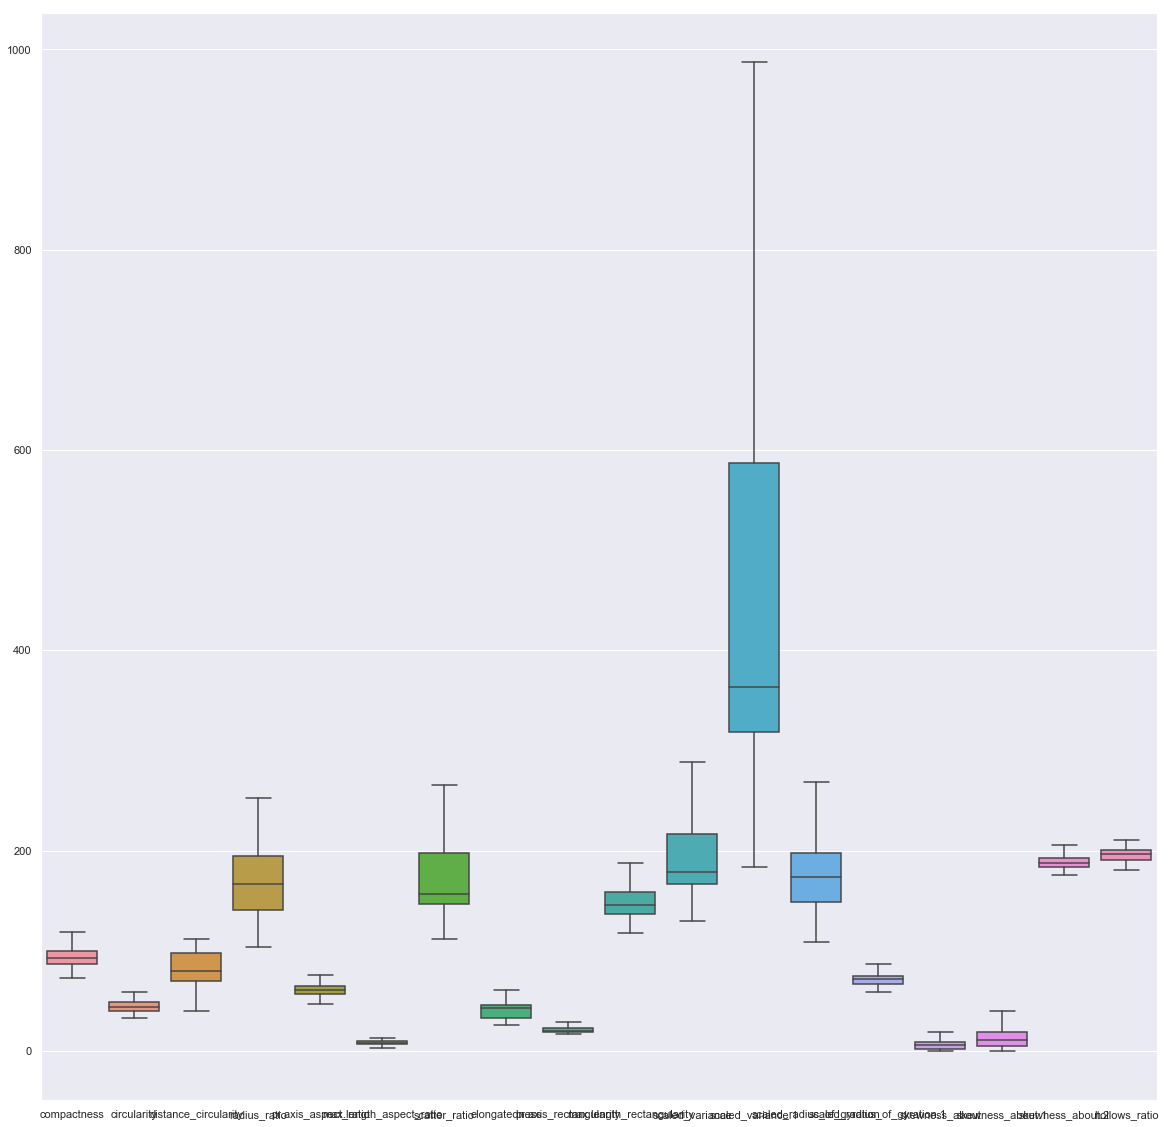

In [351]:
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(data=X)

###### 2. Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why 

In [352]:
X.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.684887,0.789928,0.710878,0.176170,0.467728,0.812620,-0.788750,0.813694,0.676143,0.769136,0.814157,0.585243,-0.263751,0.232925,0.157026,0.298537,0.365552
circularity,0.684887,1.000000,0.792320,0.634826,0.201055,0.546423,0.847938,-0.821472,0.843400,0.961318,0.802624,0.836089,0.925816,0.056482,0.144539,-0.011382,-0.104426,0.046351
distance_circularity,0.789928,0.792320,1.000000,0.786789,0.235127,0.642736,0.905076,-0.911307,0.893025,0.774527,0.869032,0.886396,0.705771,-0.247726,0.113068,0.265497,0.146098,0.332732
radius_ratio,0.710878,0.634826,0.786789,1.000000,0.673058,0.488952,0.757602,-0.813350,0.731424,0.579211,0.792655,0.742276,0.548203,-0.337235,0.050374,0.178753,0.396505,0.485064
pr.axis_aspect_ratio,0.176170,0.201055,0.235127,0.673058,1.000000,0.191114,0.180990,-0.284451,0.150014,0.150102,0.227740,0.165246,0.149654,-0.270286,-0.056106,-0.026097,0.381321,0.400661
max.length_aspect_ratio,0.467728,0.546423,0.642736,0.488952,0.191114,1.000000,0.466271,-0.482814,0.462141,0.631608,0.414480,0.424572,0.389211,-0.295673,0.094146,0.137207,0.068139,0.394172
scatter_ratio,0.812620,0.847938,0.905076,0.757602,0.180990,0.466271,1.000000,-0.971601,0.989751,0.809083,0.959040,0.993094,0.799875,-0.012569,0.073785,0.212448,0.005628,0.118817
elongatedness,-0.788750,-0.821472,-0.911307,-0.813350,-0.284451,-0.482814,-0.971601,1.000000,-0.948996,-0.775854,-0.946121,-0.954131,-0.766314,0.102532,-0.052406,-0.185046,-0.115126,-0.216905
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.731424,0.150014,0.462141,0.989751,-0.948996,1.000000,0.810934,0.945120,0.988210,0.796690,0.003542,0.083002,0.214717,-0.018649,0.099286
max.length_rectangularity,0.676143,0.961318,0.774527,0.579211,0.150102,0.631608,0.809083,-0.775854,0.810934,1.000000,0.750386,0.794837,0.866450,0.044230,0.136347,0.001458,-0.103948,0.076770


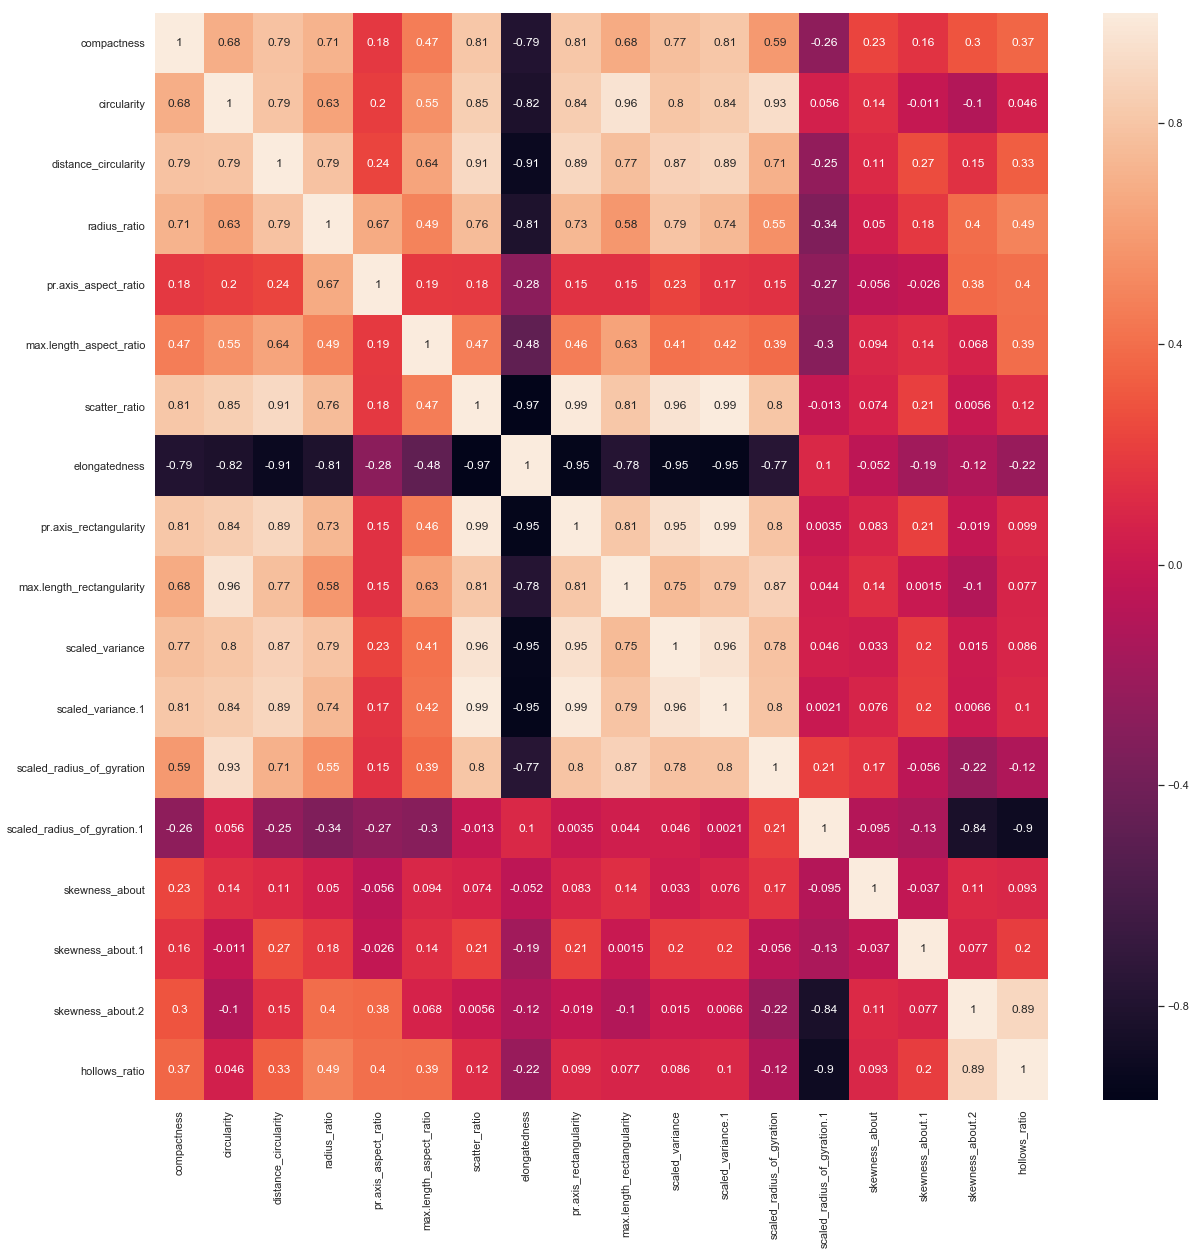

In [353]:
sns.heatmap(X.corr(), annot=True)

We can see here that many of the independent variables are having very high correlation (.90-.99). Since they are so correlated that we can keep only one out of them for our analysis. 

1. circularity has highly positive corelation (.96) with max.length_rectangularity and (.93) with scaled_radius_of_gyration
2. scatter_ratio has highly positive corelation (.99) with pr.axis_rectangularity and scaled_variance.1 and (.96) with scaled_variance and (.91) with distance_circularity 
3. Hence we can keep those two variables and remove max.length_rectangularity, scaled_radius_of_gyration, pr.axis_rectangularity, scaled_variance.1, scaled_variance and distance_circularity

In [354]:
X.drop(columns=['max.length_rectangularity','scaled_radius_of_gyration','pr.axis_rectangularity','scaled_variance.1','scaled_variance','distance_circularity'], inplace=True)

In [355]:
X.shape

(846, 12)

In [356]:
X.head()

,compactness,circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,178.0,72.0,10.0,162.0,42.0,70.0,6.0,16.0,187.0,197
1,91,41.0,141.0,57.0,9.0,149.0,45.0,72.0,9.0,14.0,189.0,199
2,104,50.0,209.0,66.0,10.0,207.0,32.0,73.0,14.0,9.0,188.0,196
3,93,41.0,159.0,63.0,9.0,144.0,46.0,63.0,6.0,10.0,199.0,207
4,85,44.0,205.0,72.0,12.0,149.0,45.0,87.0,9.0,11.0,180.0,183


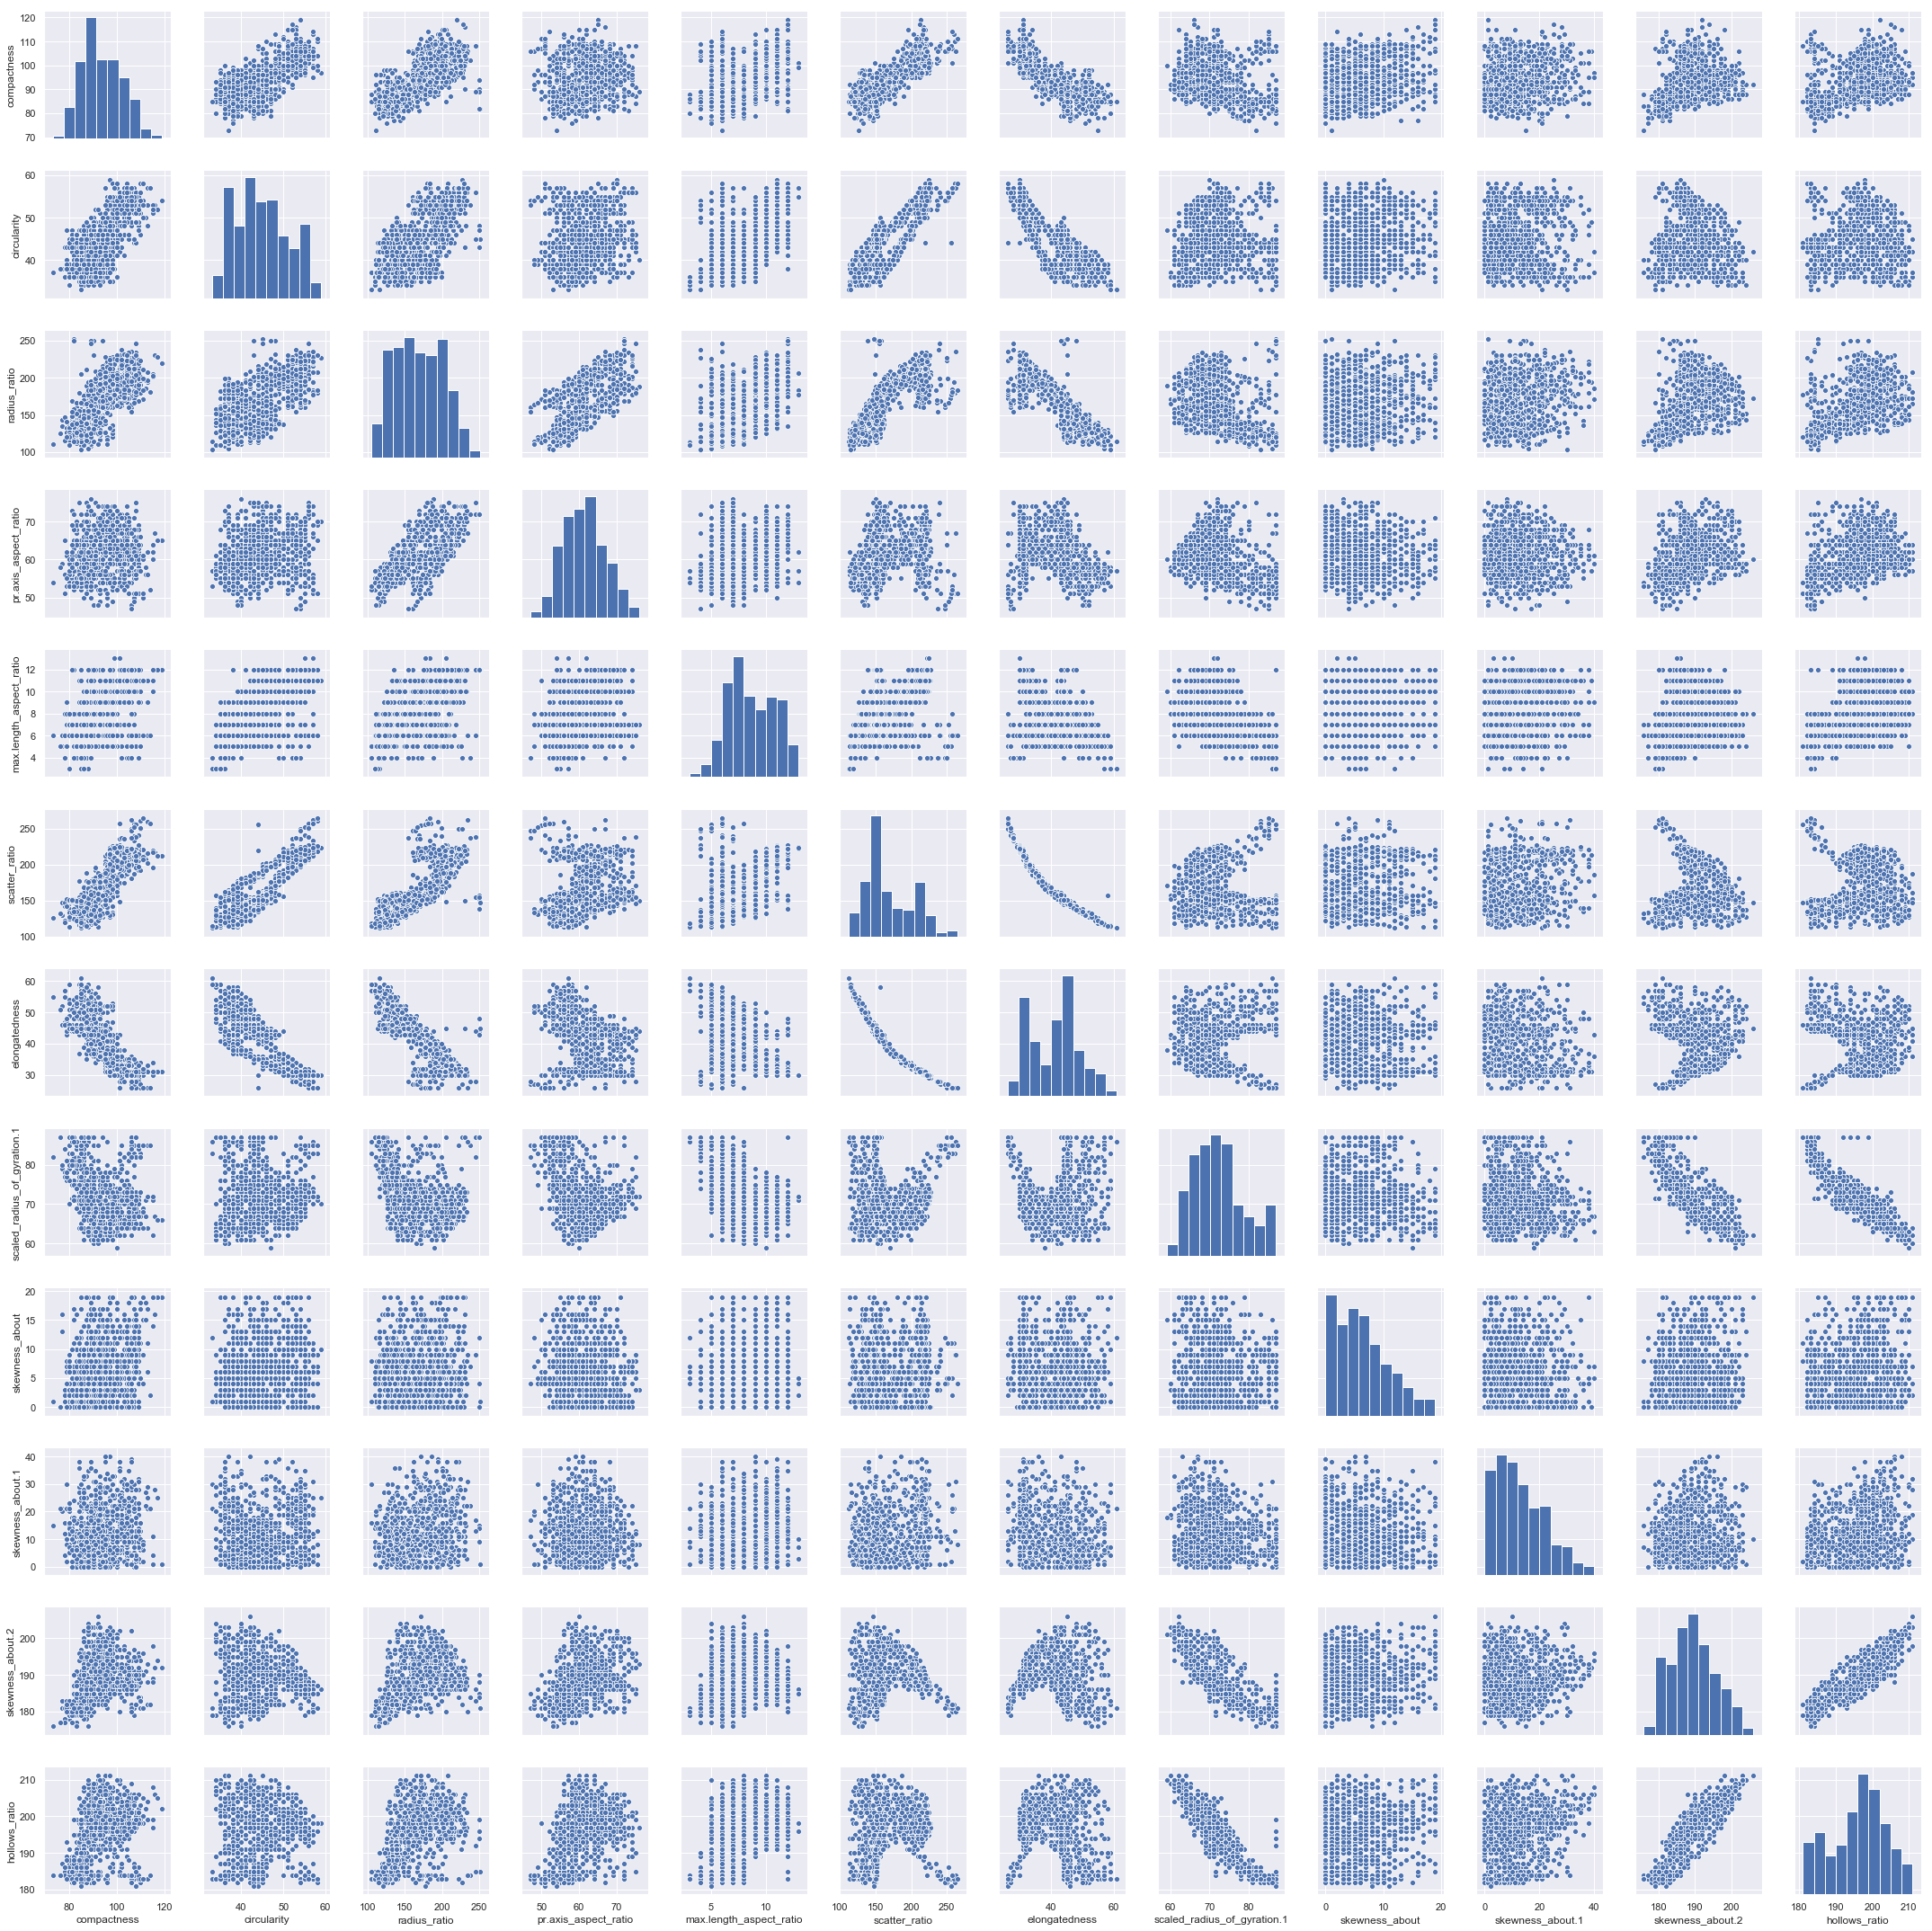

In [357]:
sns.pairplot(X)

###### 3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance)

In [358]:
X_sd = StandardScaler().fit_transform(X)

In [359]:
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n',cov_matrix)

Covariance Matrix 
 [[ 1.00118343  0.68569786  0.71171887  0.17637893  0.46828146  0.81358214
  -0.78968322 -0.26406291  0.23320056  0.15721202  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.63557771  0.20129249  0.54706958  0.8489411
  -0.82244387  0.05654873  0.14470995 -0.01139577 -0.10455005  0.04640562]
 [ 0.71171887  0.63557771  1.00118343  0.67385462  0.4895303   0.75849857
  -0.81431271 -0.33763402  0.05043385  0.17896409  0.3969746   0.48563825]
 [ 0.17637893  0.20129249  0.67385462  1.00118343  0.19134042  0.18120405
  -0.28478722 -0.27060571 -0.05617223 -0.02612772  0.38177258  0.4011353 ]
 [ 0.46828146  0.54706958  0.4895303   0.19134042  1.00118343  0.46682248
  -0.48338508 -0.29602259  0.09425727  0.13736981  0.06821929  0.39463896]
 [ 0.81358214  0.8489411   0.75849857  0.18120405  0.46682248  1.00118343
  -0.97275069 -0.01258426  0.07387213  0.21269927  0.00563439  0.1189581 ]
 [-0.78968322 -0.82244387 -0.81431271 -0.28478722 -0.48338508 -0.97275069
   1.00118343

In [360]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n', e_vecs)

Eigenvectors 
 [[ 3.78376991e-01 -1.06470767e-01  2.07959380e-01 -2.10180714e-02
  -7.24732562e-02  2.96514043e-01  7.30594349e-01  3.05760721e-01
   2.43285623e-01  1.15020613e-01 -9.25185231e-02  1.99494610e-02]
 [ 3.29967669e-01 -3.27502622e-01  2.45334710e-02 -1.47458743e-01
   1.38722690e-01  4.40726223e-03 -4.82407629e-01  6.87317322e-01
  -2.94128889e-02  6.10459013e-02  1.65688766e-01 -7.13251731e-02]
 [ 4.07812233e-01 -4.03199008e-03 -2.51921521e-01 -4.87442109e-02
  -1.91826501e-01 -9.74773886e-02  8.59707047e-02 -2.89859912e-01
  -4.88242366e-03  8.69872826e-02  7.86071183e-01  6.80071045e-02]
 [ 2.14114370e-01  1.69786749e-01 -5.81053133e-01 -2.53382365e-01
  -3.02613862e-01 -4.71009732e-01  7.59932375e-02  1.63070808e-01
   1.61719101e-01 -7.62504233e-02 -3.79726942e-01 -3.93701151e-02]
 [ 2.84718407e-01 -4.58057535e-02  1.28227129e-01  5.87204309e-02
   6.89491800e-01 -5.20455569e-01  2.15357085e-01 -1.47114142e-01
  -1.60921122e-01 -6.34304962e-02 -5.19202724e-02 -2.2369

In [361]:
print('EigenValues \n',e_vals)

EigenValues 
 [5.06791741 2.72677905 1.14353506 1.07144276 0.76158258 0.67350222
 0.20761431 0.1441074  0.11133349 0.01387518 0.05636642 0.0361453 ]


In order to decide which eigen vector(s) can be dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigen vectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped. In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order to choose the top k eigen vectors.

In [362]:
tot = sum(e_vals)
var_exp = [(i/tot)*100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Cummulative Variance Explained', cum_var_exp)

Cummulative Variance Explained [ 42.18272473  64.87902392  74.39721864  83.31535429  89.65437397
  95.26025826  96.98833241  98.18780795  99.11449037  99.58365534
  99.88451014 100.        ]


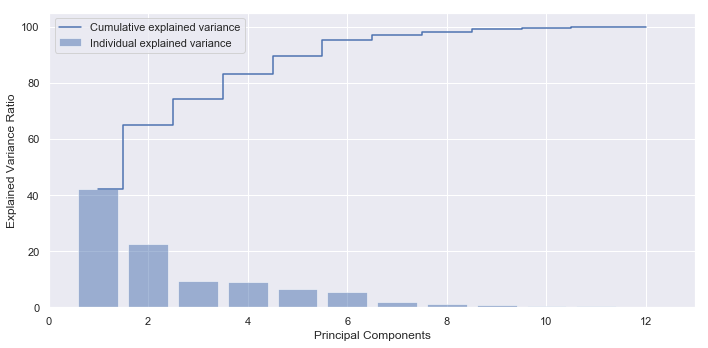

In [363]:
#ploting
plt.figure(figsize=(10,5))
plt.bar(range(1,e_vals.size+1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1,e_vals.size+1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

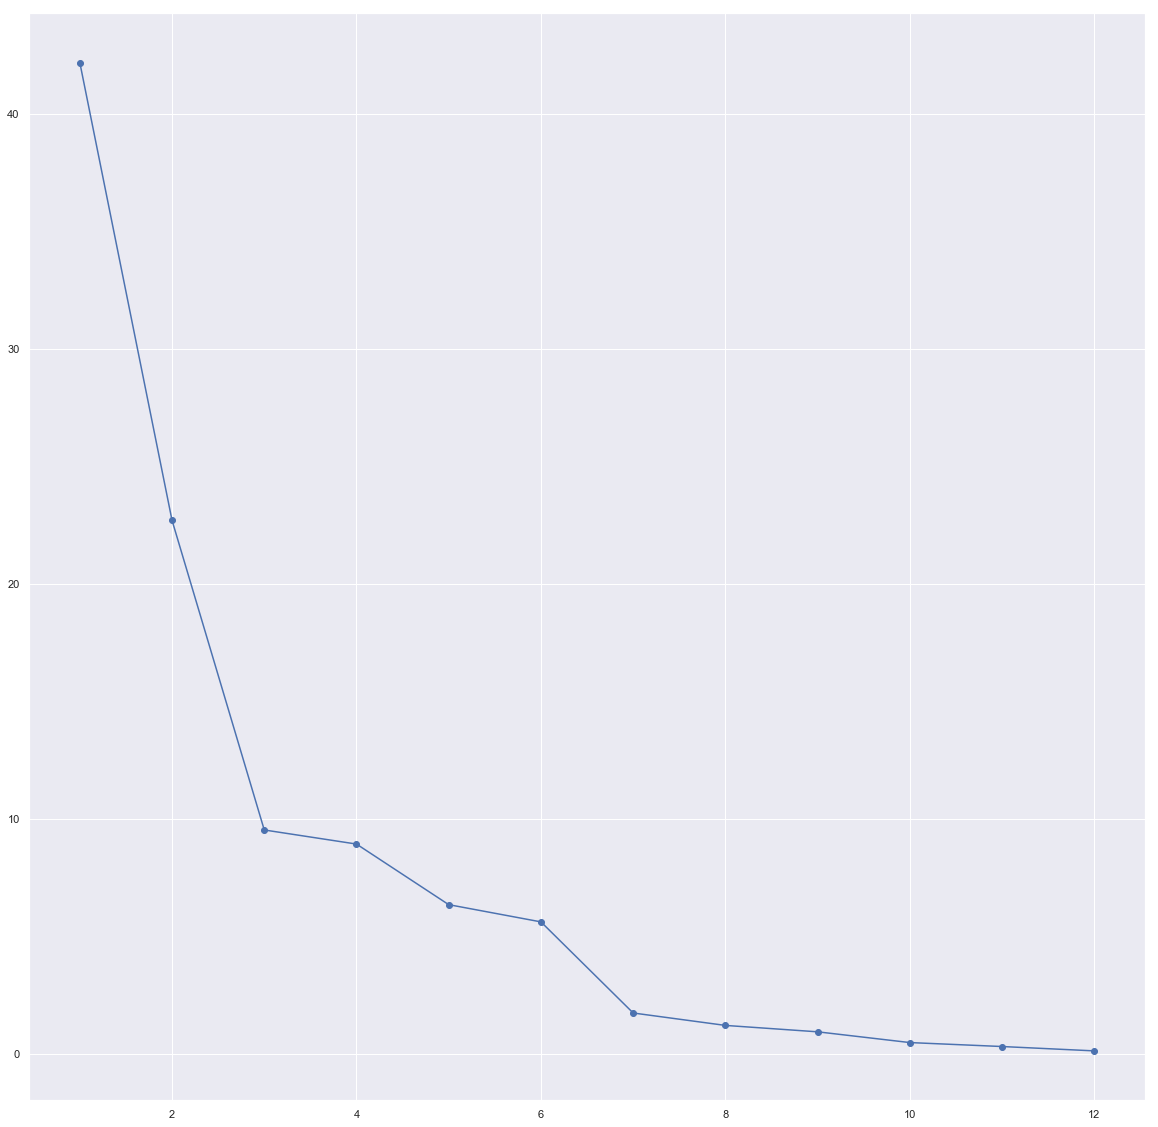

In [364]:
#elbow plot
plt.plot( range(1,e_vals.size+1), var_exp, marker = "o" )

If we see the cumulitive variance as well as elbow plot, we can see that first 7 PCA components are covering more than 95% of coverage. 

In [365]:
pca=PCA(n_components=7)

In [366]:
X_reduced = pca.fit_transform(X_sd)

In [367]:
X_reduced

array([[-0.9575241 , -0.29616889,  0.9434403 , ..., -0.08899041,
         1.51777767,  0.15193372],
       [ 0.96665648, -0.64464309, -1.07628185, ..., -0.47734785,
         0.32806073,  0.1237302 ],
       [-2.58457617,  1.02309516, -0.5892372 , ...,  0.54323456,
         0.67219548,  0.36030991],
       ...,
       [-3.65313051,  1.06670892,  1.01095087, ..., -1.30981953,
         0.01346107,  0.38935123],
       [ 1.96582058, -1.62752351,  0.31685603, ..., -0.16699018,
        -0.14496352, -0.03619487],
       [ 3.73998169, -0.71292887,  0.14393411, ...,  0.11882344,
        -0.52313738,  0.19766186]])

In [368]:
X_reduced.shape

(846, 7)

In [369]:
# Loadings or Eigen vectors on the PCA components
pca.components_

array([[-0.37837699, -0.32996767, -0.40781223, -0.21411437, -0.28471841,
        -0.37117822,  0.3897574 ,  0.20399014, -0.0692942 , -0.10014009,
        -0.19911523, -0.26260076],
       [ 0.10647077,  0.32750262,  0.00403199, -0.16978675,  0.04580575,
         0.29565548, -0.2322158 ,  0.4878721 , -0.01421853, -0.03977237,
        -0.50117015, -0.46706851],
       [-0.20795938, -0.02453347,  0.25192152,  0.58105313, -0.12822713,
        -0.01904193, -0.04842249,  0.13312419, -0.69696857, -0.16409142,
        -0.02991216, -0.06786979],
       [-0.02101807, -0.14745874, -0.04874421, -0.25338237,  0.05872043,
         0.08798695, -0.05277979, -0.03247417, -0.43256613,  0.83745714,
        -0.06966891,  0.05388693],
       [ 0.07247326, -0.13872269,  0.1918265 ,  0.30261386, -0.6894918 ,
         0.08149403, -0.07751107,  0.20262359,  0.399255  ,  0.34904122,
         0.13235059, -0.13883652],
       [-0.29651404, -0.00440726,  0.09747739,  0.47100973,  0.52045557,
        -0.2008749 ,  

###### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy.

Using SVM classifier method to find the accuracy

In [370]:
clf=svm.SVC()

In [371]:
clf.fit(X_reduced,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [372]:
clf.score(X_reduced,y)

0.9527186761229315

Accuracy using cross validation

In [373]:
kfold = KFold(n_splits = 10, random_state=10)

In [374]:
result = cross_val_score(clf, X_reduced, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.9124089635854341


Grid search to find best hyperparamters in SVM

In [375]:
kernel=['linear','rbf']
C = [0.01,0.05,0.5,1.0]
param_grid = dict(kernel=kernel,C=C)

In [376]:
grid = GridSearchCV(estimator=clf,param_grid=param_grid, cv=10, n_jobs = -1)
start_time = time.time()
grid_result = grid.fit(X_reduced,y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.916076 using {'C': 0.5, 'kernel': 'rbf'}
Execution time: 0.38197779655456543 ms


Using the best hyperparameters to get accuracy

In [377]:
clf=svm.SVC(C=1.0,kernel='rbf')

In [378]:
result = cross_val_score(clf, X_reduced, y, cv=kfold, scoring='accuracy')
print('Accuracy: ', result.mean())

Accuracy:  0.9124089635854341
